In [16]:
input_path = '../input'

In [17]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

for dirname, _, filenames in os.walk(input_path):
    print(dirname)

../input
../input/test
../input/training
../input/evaluation


In [18]:

training_path = Path(input_path) / 'training'
evaluation_path = Path(input_path) / 'evaluation'
test_path = Path(input_path) / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [19]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

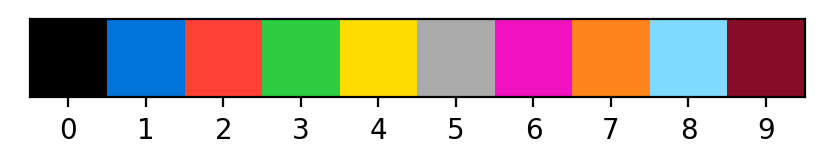

In [20]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [21]:
def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [22]:
def Defensive_Copy(A): 
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [23]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [24]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [25]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [26]:
submission = pd.read_csv(Path(input_path)/'sample_submission.csv')

In [27]:
# ColorAndCountingModuloQ
def fun01_Recolor(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    N = len(Input)
    
    for x, y in zip(Input, Output):
        if len(x) != len(y) or len(x[0]) != len(y[0]):
            return -1
        
    Best_Dict = -1
    Best_Q1 = -1
    Best_Q2 = -1
    Best_v = -1
    # v ranges from 0 to 3. This gives an extra flexibility of measuring distance from any of the 4 corners
    Pairs = []
    for t in range(15):
        for Q1 in range(1,8):
            for Q2 in range(1,8):
                if Q1+Q2 == t:
                    Pairs.append((Q1,Q2))
                    
    for Q1, Q2 in Pairs:
        for v in range(4):
    
  
            if Best_Dict != -1:
                continue
            possible = True
            Dict = {}
                      
            for x, y in zip(Input, Output):
                n = len(x)
                k = len(x[0])
                for i in range(n):
                    for j in range(k):
                        if v == 0 or v ==2:
                            p1 = i%Q1
                        else:
                            p1 = (n-1-i)%Q1
                        if v == 0 or v ==3:
                            p2 = j%Q2
                        else :
                            p2 = (k-1-j)%Q2
                        color1 = x[i][j]
                        color2 = y[i][j]
                        if color1 != color2:
                            rule = (p1, p2, color1)
                            if rule not in Dict:
                                Dict[rule] = color2
                            elif Dict[rule] != color2:
                                possible = False
            if possible:
                
                # Let's see if we actually solve the problem
                for x, y in zip(Input, Output):
                    n = len(x)
                    k = len(x[0])
                    for i in range(n):
                        for j in range(k):
                            if v == 0 or v ==2:
                                p1 = i%Q1
                            else:
                                p1 = (n-1-i)%Q1
                            if v == 0 or v ==3:
                                p2 = j%Q2
                            else :
                                p2 = (k-1-j)%Q2
                           
                            color1 = x[i][j]
                            rule = (p1,p2,color1)
                            
                            if rule in Dict:
                                color2 = 0 + Dict[rule]
                            else:
                                color2 = 0 + y[i][j]
                            if color2 != y[i][j]:
                                possible = False 
                if possible:
                    Best_Dict = Dict
                    Best_Q1 = Q1
                    Best_Q2 = Q2
                    Best_v = v
                
                
    if Best_Dict == -1:
        return -1 #meaning that we didn't find a rule that works for the traning cases
    
    #Otherwise there is a rule: so let's use it:
    n = len(Test_Picture)
    k = len(Test_Picture[0])
    
    answer = np.zeros((n,k), dtype = int)
   
    for i in range(n):
        for j in range(k):
            if Best_v == 0 or Best_v ==2:
                p1 = i%Best_Q1
            else:
                p1 = (n-1-i)%Best_Q1
            if Best_v == 0 or Best_v ==3:
                p2 = j%Best_Q2
            else :
                p2 = (k-1-j)%Best_Q2
           
            color1 = Test_Picture[i][j]
            rule = (p1, p2, color1)
            if (p1, p2, color1) in Best_Dict:
                answer[i][j] = 0 + Best_Dict[rule]
            else:
                answer[i][j] = 0 + color1 
    return answer.tolist()

In [28]:
Solved = []
Problems = submission['output_id'].values
Proposed_Answers = []
Total_solutions = 0
for i in  range(len(Problems)):
    output_id = Problems[i]
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
   
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][j]['input']) for j in range(n)]
    Output = [Defensive_Copy(task['train'][j]['output']) for j in range(n)]
    Input.append(Defensive_Copy(task['test'][pair_id]['input']))
    
    total_outpus = 0
    preds = []
    seq_methods = {'recolor':fun01_Recolor}
    for name,methods in seq_methods.items():
        try:
            solution = methods([Input, Output])
            if solution != -1:
                Total_solutions += 1
                Solved.append((name,i))
                new_pred = flattener(solution)
                if new_pred not in preds:
                    preds.append(new_pred)
                    total_outpus += 1
            if total_outpus == 3:
                break
        except:
            pass
    
    if len(preds) == 0:
        pred_flat = flattener(example_grid)
    else:
        pred_flat = ' '.join(preds)
    Proposed_Answers.append(pred_flat)
submission['output'] = Proposed_Answers
submission.to_csv('submission.csv', index = False)

In [29]:
print(Total_solutions)

2


In [30]:
Solved

[('recolor', 47), ('recolor', 85)]